In [363]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
!pip install bioinfokit

In [364]:
df = pd.read_csv("mcdonalds.csv")

In [365]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [366]:
df.shape

(1453, 15)

In [367]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [368]:
def convert(input):
  if input == "Yes":
    return 1
  else :
    return 0

In [369]:
MD  = df.iloc[:,  :11].applymap(convert)

In [370]:
MD.astype(int).mean().round(2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [371]:
MD

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [372]:
from sklearn.decomposition import PCA
pca = PCA()

In [373]:
pca_data = pca.fit_transform(MD)
pca_data

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [374]:
Standard_Deviation = np.sqrt(pca.explained_variance_).round(5)

In [375]:
Standard_Deviation

array([0.75705, 0.60746, 0.50462, 0.3988 , 0.33741, 0.31027, 0.2897 ,
       0.27512, 0.26525, 0.24884, 0.2369 ])

In [376]:
Proportion_of_Variance = pca.explained_variance_ratio_.round(5)

In [377]:
Proportion_of_Variance

array([0.29945, 0.1928 , 0.13305, 0.0831 , 0.05948, 0.0503 , 0.04385,
       0.03955, 0.03676, 0.03235, 0.02932])

In [378]:
Cumulative_Proportion = Proportion_of_Variance.cumsum()

In [379]:
Cumulative_Proportion

array([0.29945, 0.49225, 0.6253 , 0.7084 , 0.76788, 0.81818, 0.86203,
       0.90158, 0.93834, 0.97069, 1.00001])

In [380]:
dic = {"Standard Deviation" : Standard_Deviation , "Proportion of Variance" : Proportion_of_Variance , "Cumulative Proportion" : Cumulative_Proportion}

In [381]:
pca_summary = pd.DataFrame(dic , index= [f"PC{i}" for i in range(1,12)]).transpose()
pca_summary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard Deviation,0.75705,0.60746,0.50462,0.3988,0.33741,0.31027,0.28970,0.27512,0.26525,0.24884,0.23690
Proportion of Variance,0.29945,0.19280,0.13305,0.0831,0.05948,0.05030,0.04385,0.03955,0.03676,0.03235,0.02932
Cumulative Proportion,0.29945,0.49225,0.62530,0.7084,0.76788,0.81818,0.86203,0.90158,0.93834,0.97069,1.00001


In [382]:
pca_summary.iloc[0].values.round(1)

array([0.8, 0.6, 0.5, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2])

In [383]:
pd.DataFrame(pca.components_.round(3).T , index = MD.columns , columns= [f"PC{i}" for i in range(1,12)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.477,0.364,-0.304,0.055,-0.308,0.171,-0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,-0.142,0.278,-0.348,-0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,0.198,0.071,-0.355,0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,-0.354,-0.073,-0.407,-0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,0.254,0.361,0.209,0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,-0.097,0.108,-0.595,-0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,0.119,-0.129,-0.103,-0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,-0.003,-0.211,-0.077,0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,0.068,-0.003,-0.261,-0.068,0.030,0.067,0.454,-0.490
healthy,-0.214,0.077,0.192,0.763,0.288,-0.178,-0.350,0.176,-0.186,-0.038,0.158


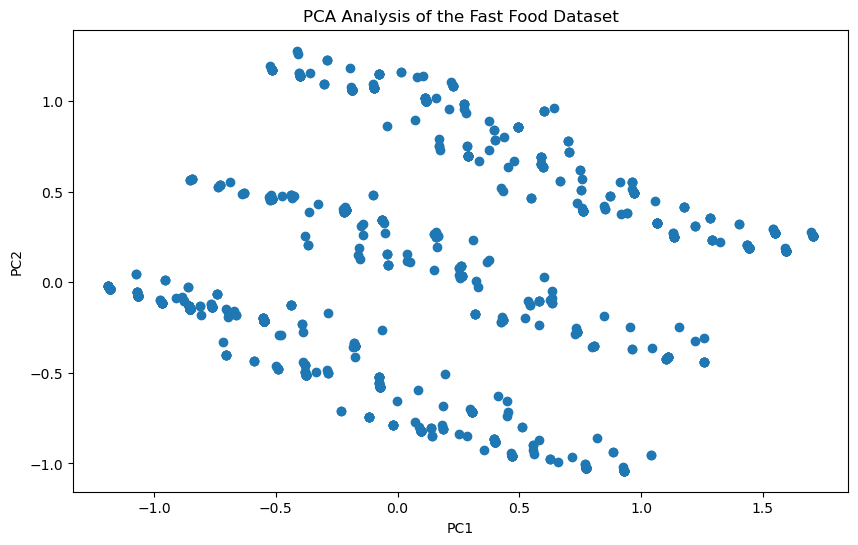

In [384]:
import matplotlib.pyplot as plt
plt.scatter(pca_data[: , 0],  pca_data[: , 1])
plt.title('PCA Analysis of the Fast Food Dataset')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


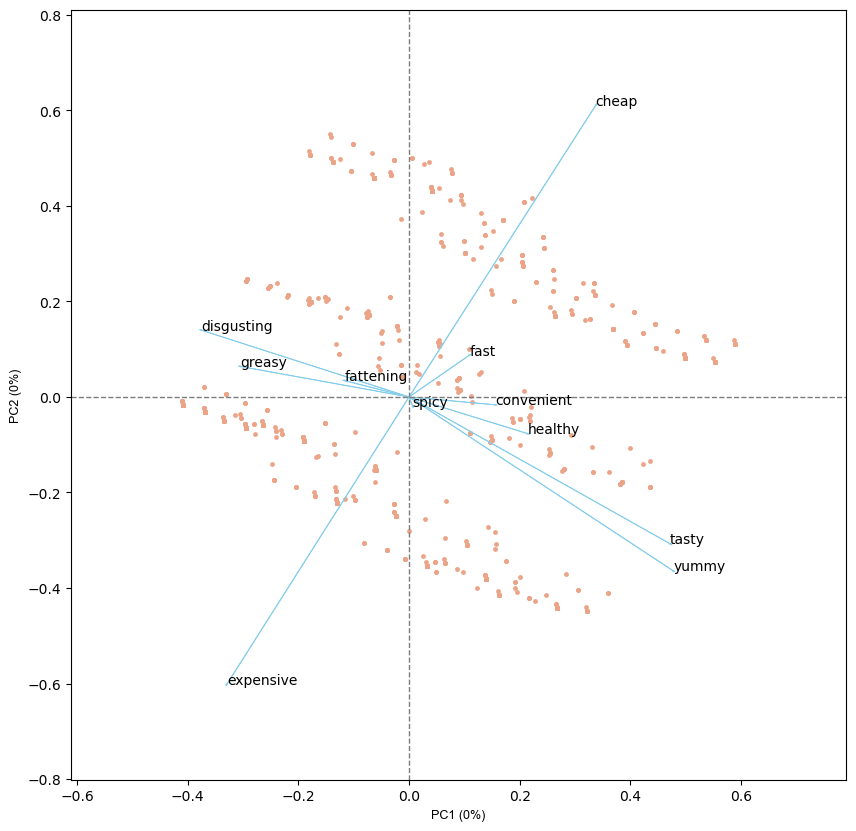

In [385]:
from bioinfokit.visuz import cluster

cluster.biplot(cscore=pca_data, loadings=-pca.components_, labels=df.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

## K-Means Clustering ::

In [386]:

from sklearn.cluster import KMeans
wcss = []
MD_km28 = {}
for i in range(1,9):
    km = KMeans(n_clusters=i)
    MD_km28[str(i)] = km
    km.fit_predict(MD)
    wcss.append(km.inertia_)

In [387]:
wcss

[2779.0406056434963,
 2145.503726917162,
 1819.76012354363,
 1603.0469335454227,
 1435.4255947308707,
 1342.3571343641493,
 1257.8685973492202,
 1208.3777663634505]

Text(0, 0.5, 'Sum of within cluster distances')

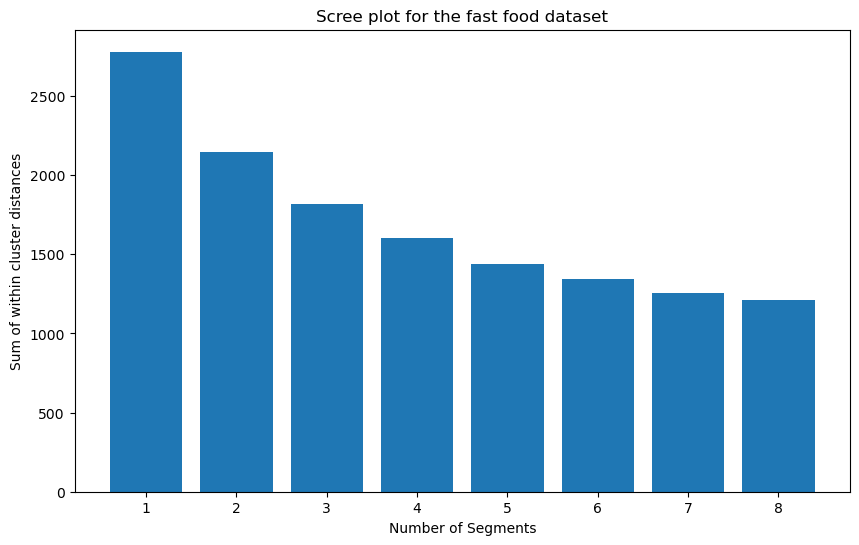

In [388]:
plt.bar(range(1,9) , wcss)
plt.title("Scree plot for the fast food dataset")
plt.xlabel("Number of Segments")
plt.ylabel("Sum of within cluster distances")

Text(0, 0.5, 'wcss')

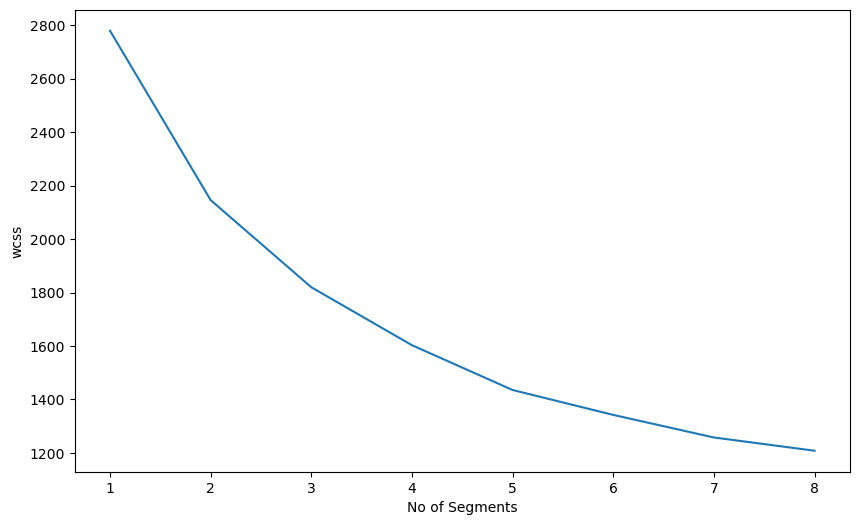

In [389]:
plt.plot(range(1,9) , wcss)
plt.xlabel("No of Segments")
plt.ylabel("wcss")

## Adjusted Rand Index (ARI) ::

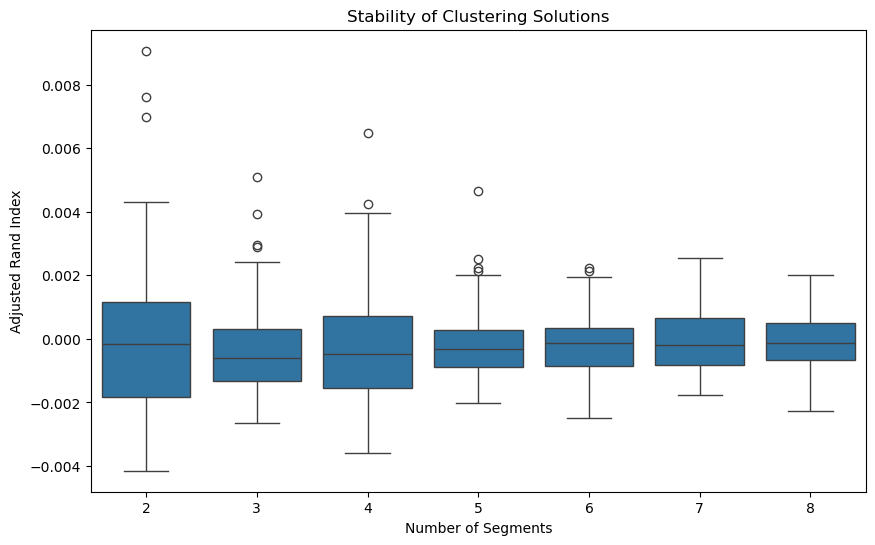

In [228]:
from sklearn.metrics import adjusted_rand_score
import seaborn as sns

def perform_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
    kmeans.fit(data)
    return kmeans.labels_

def generate_bootstrap_sample(data):
    indices = np.random.choice(range(data.shape[0]), size=data.shape[0], replace=True)
    return data[indices]

def calculate_clustering_score(clustering_result, data):
    kmeans = KMeans(n_clusters=len(np.unique(clustering_result)), init='k-means++', n_init=1, max_iter=1, random_state=0)
    kmeans.fit(data)
    return kmeans.inertia_

def calculate_ari(original_clustering, bootstrap_clustering):
    return adjusted_rand_score(original_clustering, bootstrap_clustering)

def bootFlexclust(data, cluster_range, nrep, nboot):
    np.random.seed(1234) 

    original_clusters = {}
    for k in cluster_range:
        original_clusters[k] = perform_clustering(data, k)

    aris = {k: [] for k in cluster_range}

    for _ in range(nboot):
        bootstrap_sample = generate_bootstrap_sample(data)

        for k in cluster_range:
            best_clustering = None
            best_score = float('inf')

            for _ in range(nrep):
                clustering_result = perform_clustering(bootstrap_sample, k)
                score = calculate_clustering_score(clustering_result, bootstrap_sample)

                if score < best_score:
                    best_clustering = clustering_result
                    best_score = score

            ari_value = calculate_ari(original_clusters[k], best_clustering)
            aris[k].append(ari_value)

    return aris

def plot_ari_boxplot(aris):
    data = []
    for k, ari_values in aris.items():
        for ari in ari_values:
            data.append((k, ari))

    df = pd.DataFrame(data, columns=["Number of Segments", "Adjusted Rand Index"])
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Number of Segments", y="Adjusted Rand Index", data=df)
    plt.xlabel('Number of Segments')
    plt.ylabel('Adjusted Rand Index')
    plt.title('Stability of Clustering Solutions')
    plt.show()

data = MD.values
cluster_range = range(2, 9)
nrep = 10
nboot = 100

aris = bootFlexclust(data, cluster_range, nrep, nboot)
plot_ari_boxplot(aris)


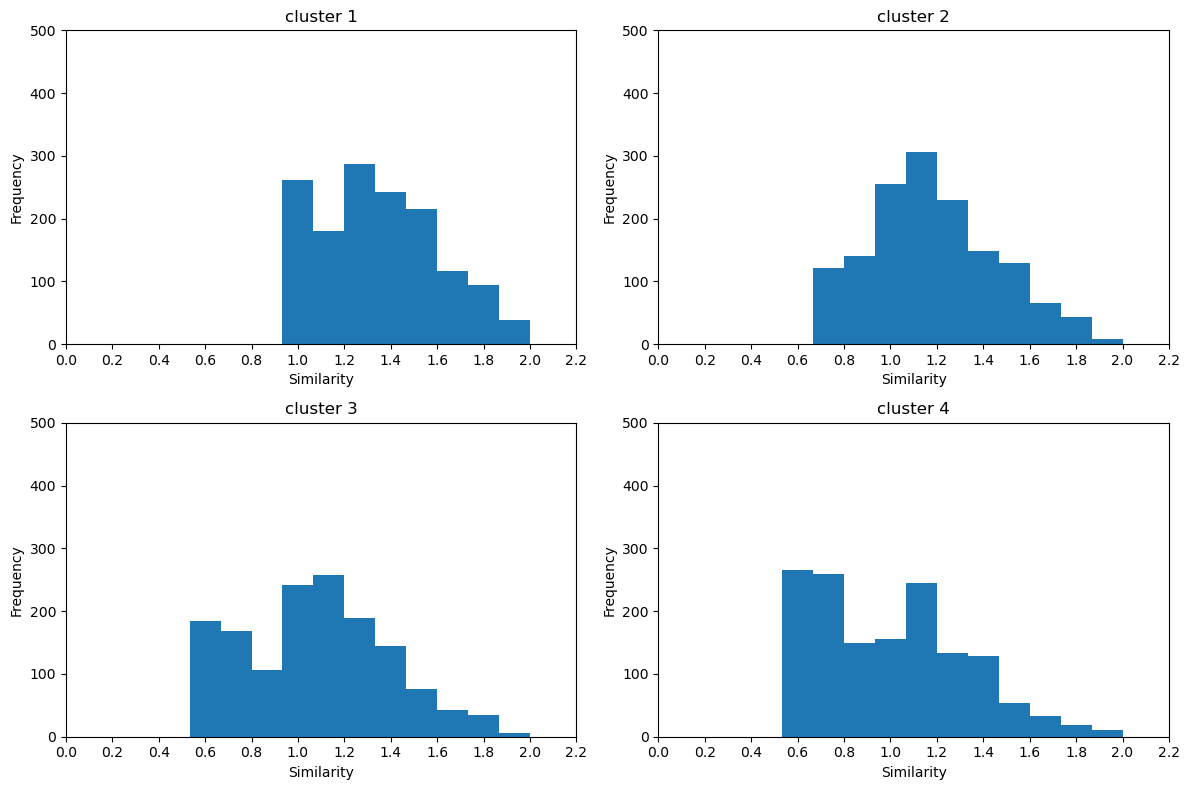

In [390]:
range_values = (0, 2)
num_bins = 15
max_frequency = 500
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD)
    similarities = MD_km28[str(i)].transform(MD).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)

    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0,1.2,1.4,1.6,1.8,2.0,2.2])

plt.tight_layout()
plt.show()


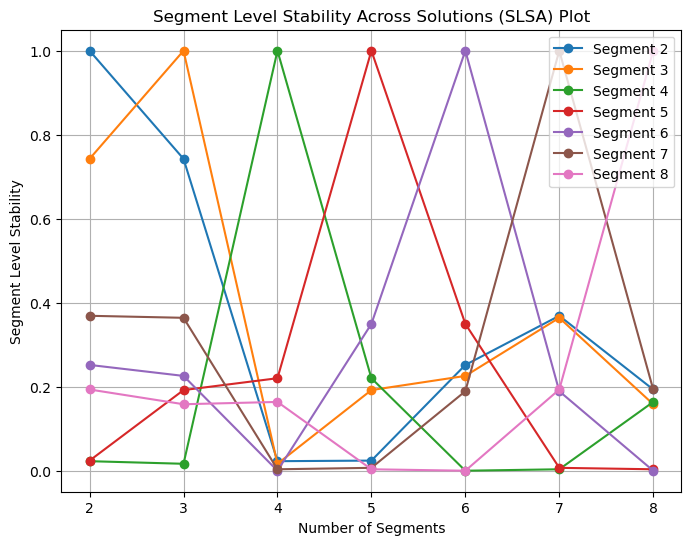

In [391]:
num_segments = range(2, 9)
segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)
plt.show()

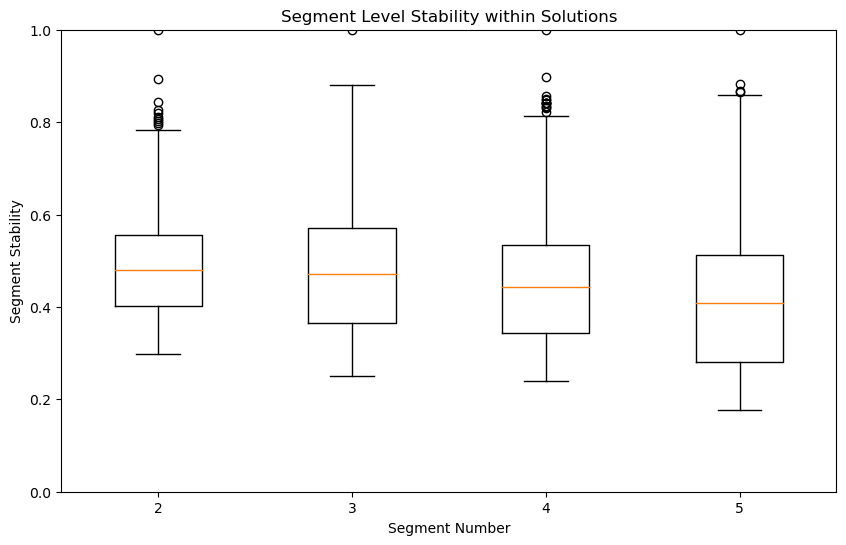

In [392]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD)
    segment_similarities[segment] = MD_km28[segment].transform(MD).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")
plt.show()

In [393]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     7       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1    10       True  3   3 -1819.748502  3645.497005  3661.341162  3660.260456
2     7       True  4   4 -1602.986015  3213.972030  3235.097572  3233.753684
3    13       True  5   5 -1435.324786  2880.649571  2907.056500  2905.465473
4    10       True  6   6 -1332.150483  2676.300966  2707.989280  2706.201149
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6    10       True  8   8 -1191.580948  2399.161896  2441.412982  2439.379225


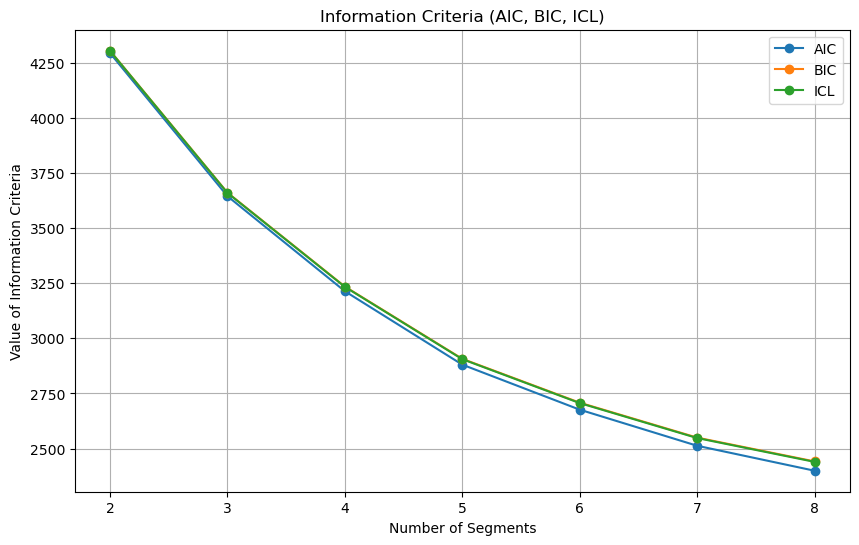

In [394]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()


In [395]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0         86    5  266    7
1          0  211   24    5
2        466    0    5   62
3          0   38    2  276
kmeans   0   1   2   3
kmeans                
0       39  20  21  10
1       22  10  15   6
2       55  20  34  19
3       34  15  22   8


In [396]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

log_likelihood_m4a = gmm_m4a.score(MD)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

log_likelihood_m4 = gmm_m4.score(MD)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)


Log-likelihood for MD.m4a: 11.068744792060572
Log-likelihood for MD.m4: 3.6427464011765824


In [397]:
like_counts = pd.value_counts(df['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [398]:
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}

df['Like.n'] = df['Like'].map(like_mapping)
like_n_counts = df['Like.n'].value_counts()
print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [399]:
from patsy import dmatrices
independent_vars = df.columns[0:11] 
formula_str = ' + '.join(independent_vars)
formula_str = 'Like ~ ' + formula_str
f = dmatrices(formula_str, data=df)[1]
print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [400]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=df)
y = dmatrix('Like', data=df)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")


GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


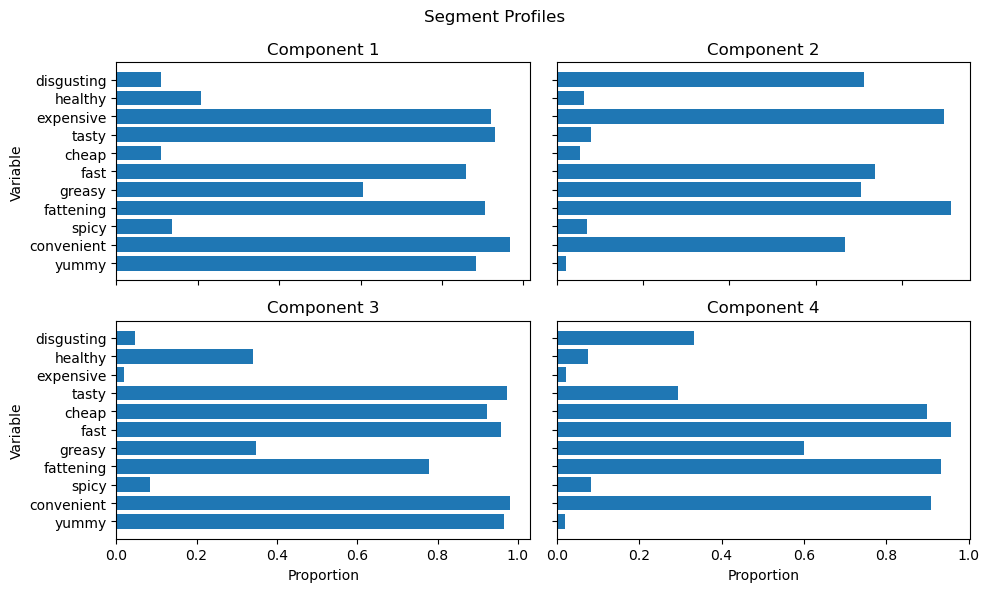

In [401]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()



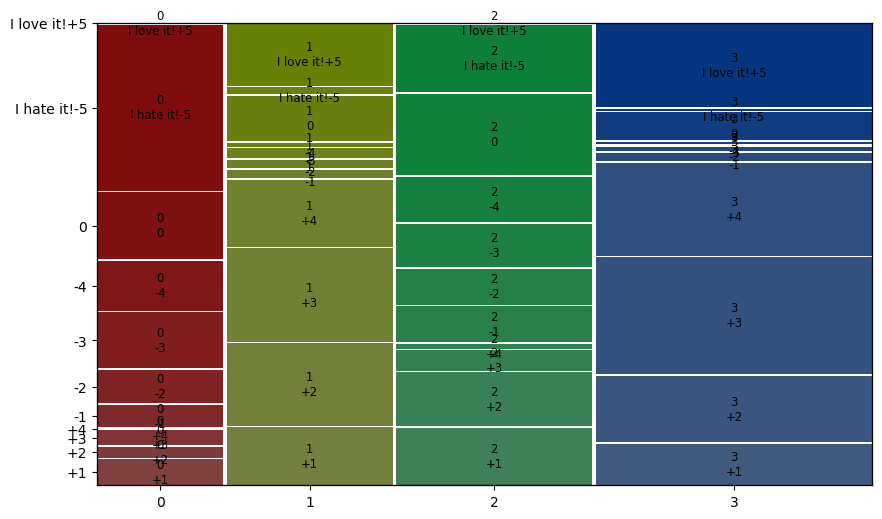

In [402]:
plt.rcParams['figure.figsize'] = (10,6)
mosaic(crosstab.stack())
plt.show()

In [403]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import LabelEncoder

df1=pd.read_csv("mcdonalds.csv")

def labelling(x):
    df1[x] = LabelEncoder().fit_transform(df1[x])
    return df1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df_eleven = df1.loc[:,cat]

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df1['cluster_num'] = kmeans.labels_
crosstab =pd.crosstab(df1['cluster_num'],df1['Like'])
crosstab

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
cluster_num,,,,,,,,,,,
0,14,6,8,0,12,18,30,27,36,89,0
1,41,58,66,47,6,6,7,3,32,5,44
2,48,45,17,4,30,30,36,38,68,56,0
3,49,78,138,109,10,5,0,3,33,2,99


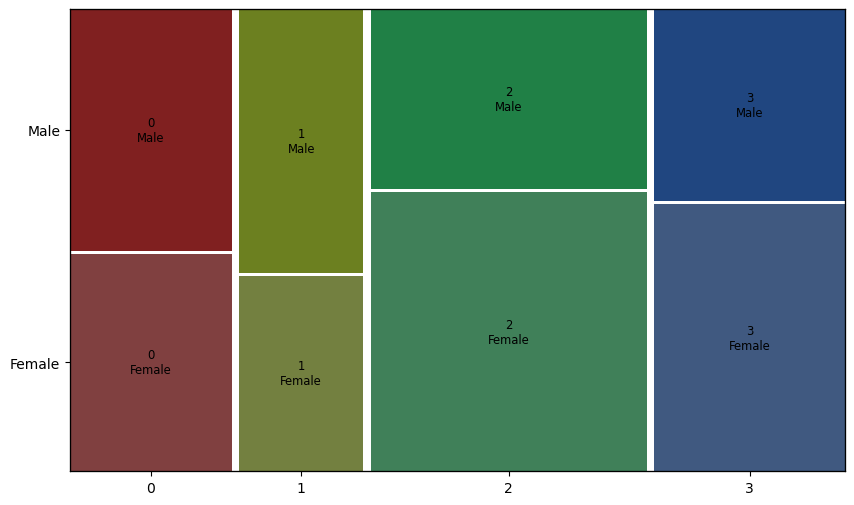

In [404]:
from statsmodels.graphics.mosaicplot import mosaic
MD_k4=MD_km28['4']
k4 = MD_k4.labels_
ct = pd.crosstab(k4, df['Gender'])
ct
mosaic(ct.stack(),gap=0.01)
plt.show()

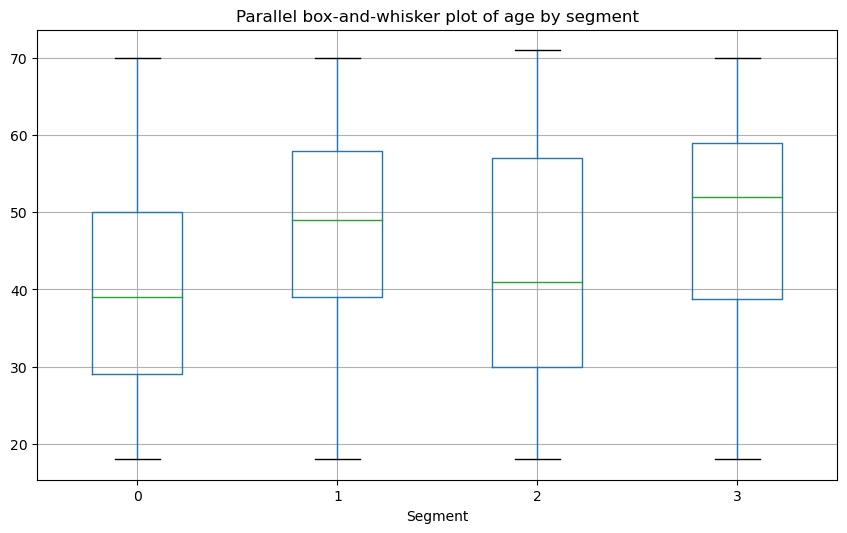

In [405]:
df2 = pd.DataFrame({'Segment': k4, 'Age': df['Age']})
df2.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [409]:
df1['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,6.741667
1,1,3.774603
2,2,5.083333
3,3,3.876426


In [411]:
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])
Gender = df1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.579167
1,1,0.526984
2,2,0.416667
3,3,0.389734


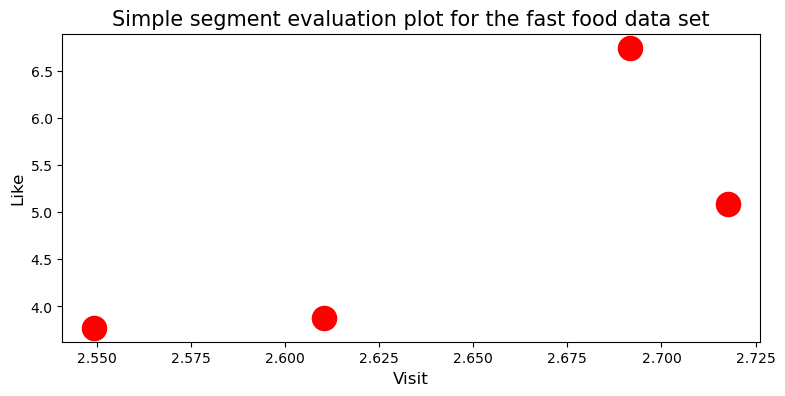

In [412]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()